In [1]:
# Import the Library
import numpy as np
import pandas as pd

In [2]:
import json

In [4]:
with open('/content/drive/MyDrive/cyber.json','r') as File:
    df = json.load(File)
df=pd.json_normalize(df)

In [5]:
df.head()

,isSafe,req.baseUrl,req.body.note.title,req.body.note.desc,req.fresh,req.headers.host,req.headers.user-agent,req.headers.content-type,req.headers.org_id,req.headers.user_session_id,req.headers.accept,req.headers.content-length,req.headers.user.name,req.headers.user.role,req.hostname,req.ip,req.ips,req.originalUrl,req.path,req.protocol,req.secure,req.stale,req.subdomains,req.xhr
0,True,/crm/note,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
1,True,/crm/note,Clayton Cooper,As possible American many prepare four strong....,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
2,False,/crm/note,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
3,True,/crm/note,Laura Fisher,State third represent energy campaign not forg...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
4,False,/crm/note,Tyler Santos,Us enjoy since. Time identify image position o...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False


In [6]:
df.shape

(1000, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   isSafe                       1000 non-null   bool  
 1   req.baseUrl                  1000 non-null   object
 2   req.body.note.title          1000 non-null   object
 3   req.body.note.desc           1000 non-null   object
 4   req.fresh                    1000 non-null   bool  
 5   req.headers.host             1000 non-null   object
 6   req.headers.user-agent       1000 non-null   object
 7   req.headers.content-type     1000 non-null   object
 8   req.headers.org_id           1000 non-null   object
 9   req.headers.user_session_id  1000 non-null   object
 10  req.headers.accept           1000 non-null   object
 11  req.headers.content-length   1000 non-null   object
 12  req.headers.user.name        1000 non-null   object
 13  req.headers.user.role        1000 

In this data there is no null values

In [8]:
df['req.baseUrl'].value_counts()

/crm/note    1000
Name: req.baseUrl, dtype: int64

In [9]:
df['isSafe'].value_counts()

True     572
False    428
Name: isSafe, dtype: int64

In [10]:
df.columns

Index(['isSafe', 'req.baseUrl', 'req.body.note.title', 'req.body.note.desc',
       'req.fresh', 'req.headers.host', 'req.headers.user-agent',
       'req.headers.content-type', 'req.headers.org_id',
       'req.headers.user_session_id', 'req.headers.accept',
       'req.headers.content-length', 'req.headers.user.name',
       'req.headers.user.role', 'req.hostname', 'req.ip', 'req.ips',
       'req.originalUrl', 'req.path', 'req.protocol', 'req.secure',
       'req.stale', 'req.subdomains', 'req.xhr'],
      dtype='object')

In [11]:

df_dict= {0:'isSafe',1: 'req.baseUrl', 2:'req.body.note.title',3: 'req.body.note.desc',
       4:'req.fresh', 5:'req.headers.host', 6:'req.headers.user-agent',
       7:'req.headers.content-type',8: 'req.headers.org_id',
       9:'req.headers.user_session_id',10: 'req.headers.accept',
       11:'req.headers.content-length',12: 'req.headers.user.name',
       13:'req.headers.user.role',14: 'req.hostname',15: 'req.ip',16: 'req.ips',
       17:'req.originalUrl',18: 'req.path',19: 'req.protocol',20: 'req.secure',
       21:'req.stale',22: 'req.subdomains',23: 'req.xhr'}

In [12]:
for i in range(0,24):
  print(df_dict[i])
  print(df[df_dict[i]].value_counts())
  print("\n\n")

isSafe
True     572
False    428
Name: isSafe, dtype: int64



req.baseUrl
/crm/note    1000
Name: req.baseUrl, dtype: int64



req.body.note.title
Michael Smith           3
David Adams             2
Heather Davis           2
Michael Davis           2
Heather Smith           2
                       ..
Shannon Morgan          1
Christopher Petersen    1
Joyce Kim               1
Timothy Cole            1
Adrienne Mason          1
Name: req.body.note.title, Length: 994, dtype: int64



req.body.note.desc
note title <title onPropertyChange title onPropertyChange="javascript:javascript:alert(1)"></title onPropertyChange>                                                                             36
Meeting ")) or (("x"))=(("x Notes 12:30                                                                                                                                                          33
text1<video src=1 href=1 onerror="javascript:alert(1)"></video>hello                               

Some parameter are same with complete dataset. because of which they are not useful for training the model.
Those attribute are:- 

1. req.baseUrl
2. req.fresh
3. req.headers.host
4. req.headers.user-agent
5. req.headers.content-type
6. req.headers.org_id
7. req.headers.user_session_id
8. req.headers.accept
9. req.headers.content-length
10. req.headers.user.name
11. req.headers.user.role
12. req.hostname
13. req.ip
14. req.ips
15. req.originalUrl
16. req.path
17. req.protocol
18. req.secure
19. req.stale
20. req.subdomains
21. req.xhr


*req.body.note.title* parameter is different for most of the dataset rows
So we will drop this parameter also.



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   isSafe                       1000 non-null   bool  
 1   req.baseUrl                  1000 non-null   object
 2   req.body.note.title          1000 non-null   object
 3   req.body.note.desc           1000 non-null   object
 4   req.fresh                    1000 non-null   bool  
 5   req.headers.host             1000 non-null   object
 6   req.headers.user-agent       1000 non-null   object
 7   req.headers.content-type     1000 non-null   object
 8   req.headers.org_id           1000 non-null   object
 9   req.headers.user_session_id  1000 non-null   object
 10  req.headers.accept           1000 non-null   object
 11  req.headers.content-length   1000 non-null   object
 12  req.headers.user.name        1000 non-null   object
 13  req.headers.user.role        1000 

In [14]:
data = df.copy()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   isSafe                       1000 non-null   bool  
 1   req.baseUrl                  1000 non-null   object
 2   req.body.note.title          1000 non-null   object
 3   req.body.note.desc           1000 non-null   object
 4   req.fresh                    1000 non-null   bool  
 5   req.headers.host             1000 non-null   object
 6   req.headers.user-agent       1000 non-null   object
 7   req.headers.content-type     1000 non-null   object
 8   req.headers.org_id           1000 non-null   object
 9   req.headers.user_session_id  1000 non-null   object
 10  req.headers.accept           1000 non-null   object
 11  req.headers.content-length   1000 non-null   object
 12  req.headers.user.name        1000 non-null   object
 13  req.headers.user.role        1000 

**Data Cleaning**

In [16]:
data = data.drop([ 'req.baseUrl', 'req.body.note.title',
       'req.fresh', 'req.headers.host', 'req.headers.user-agent',
       'req.headers.content-type', 'req.headers.org_id',
       'req.headers.user_session_id', 'req.headers.accept',
       'req.headers.content-length', 'req.headers.user.name',
       'req.headers.user.role', 'req.hostname', 'req.ip', 'req.ips',
       'req.originalUrl', 'req.path', 'req.protocol', 'req.secure',
       'req.stale', 'req.subdomains', 'req.xhr'],axis=1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   isSafe              1000 non-null   bool  
 1   req.body.note.desc  1000 non-null   object
dtypes: bool(1), object(1)
memory usage: 8.9+ KB


In [18]:

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [19]:
stemmer = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
text=[]


In [22]:
for i in range(0,1000):
    sentence = re.sub('[^a-zA-Z123456789]', ' ', data['req.body.note.desc'][i])
    sentence = sentence.lower()
    sentence = sentence.split()
    sentence = [stemmer.stem(word) for word in sentence if not word in stopwords.words('english')]
    sentence = ' '.join(sentence)
    text.append(sentence)

In [23]:
y = data['isSafe']


In [24]:
y

0       True
1       True
2      False
3       True
4      False
       ...  
995     True
996    False
997     True
998     True
999     True
Name: isSafe, Length: 1000, dtype: bool

In [25]:
type(y[3])

numpy.bool_

In [26]:
y=y.astype(int)

In [27]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    1
996    0
997    1
998    1
999    1
Name: isSafe, Length: 1000, dtype: int64

In [28]:
train_data = pd.DataFrame(list(zip(text,y)),columns=['Text','label'])


In [29]:
train_data.head()


,Text,label
0,top recogn eat fact spend area thing materi wa...,1
1,possibl american mani prepar four strong visit...,1
2,tuesday note 2 like 2 xsp class,0
3,state third repres energi campaign forget expe...,1
4,us enjoy sinc time identifi imag posit ok best...,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


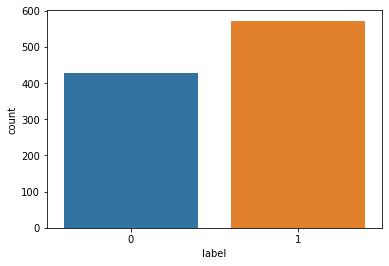

In [30]:
sns.countplot(train_data['label'])


In [32]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(text).toarray()

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.33,random_state=42)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics
classifier.fit(xtrain, ytrain)
pred = classifier.predict(xtest)
score = metrics.accuracy_score(ytest, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.836


**Accuracy: 0.836 using Multinomial Naive Bayes Classifier**

In [ ]:
# Let's see the result when we choose different values of alpha and find best best hyperparameter.
classifier=MultinomialNB(alpha=0.1)

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(xtrain,ytrain)
    y_pred=sub_classifier.predict(xtest)
    score = metrics.accuracy_score(ytest, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8181818181818182
Alpha: 0.1, Score : 0.8363636363636363
Alpha: 0.2, Score : 0.8363636363636363
Alpha: 0.30000000000000004, Score : 0.8363636363636363
Alpha: 0.4, Score : 0.8363636363636363
Alpha: 0.5, Score : 0.8363636363636363
Alpha: 0.6000000000000001, Score : 0.8363636363636363
Alpha: 0.7000000000000001, Score : 0.8363636363636363
Alpha: 0.8, Score : 0.8363636363636363
Alpha: 0.9, Score : 0.8363636363636363


In [ ]:
# Deep Learning

Let's use Tensorflow now and see If we get better accuracy

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [ ]:
voc_size = 10000
onehot_repr=[one_hot(words,voc_size)for words in text] 
sent_length=50
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.7))
model.add(LSTM(100))
model.add(Dropout(0.7))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 40)            400000    
_________________________________________________________________
dropout (Dropout)            (None, 50, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(embedded_docs),y.shape


(1000, (1000,))

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)


In [ ]:

for i in range(1000):
  if y_final[i]==1:
    y_final[i]=1
  else:
    y_final[i]=0

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


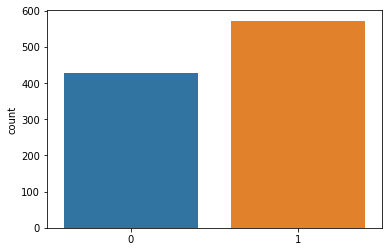

In [ ]:
sns.countplot(y_final)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)


In [ ]:
# Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
21/21 [==============================] - 4s 81ms/step - loss: 0.6839 - accuracy: 0.6648 - val_loss: 0.6173 - val_accuracy: 0.6939
Epoch 2/5
21/21 [==============================] - 1s 57ms/step - loss: 0.5806 - accuracy: 0.7642 - val_loss: 0.4882 - val_accuracy: 0.8152
Epoch 3/5
21/21 [==============================] - 1s 65ms/step - loss: 0.4689 - accuracy: 0.8232 - val_loss: 0.4674 - val_accuracy: 0.8333
Epoch 4/5
21/21 [==============================] - 1s 57ms/step - loss: 0.4348 - accuracy: 0.8217 - val_loss: 0.4205 - val_accuracy: 0.8091
Epoch 5/5
21/21 [==============================] - 1s 58ms/step - loss: 0.3654 - accuracy: 0.8150 - val_loss: 0.4254 - val_accuracy: 0.8212


In [ ]:
y_pred=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[ 91  52]
 [  7 180]]


0.8212121212121212

Using Tensorflow we get 82% accuracy and using Multinomial Naive Bayes Classifier we get 83.6% accuracy


